In [27]:
import pandas as pd 
import numpy as np
from sklearn.impute import SimpleImputer
import plotly_express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
data=pd.read_csv("C:/Users/admin/Desktop/Final_project/classification_data.csv.csv")

In [4]:
data.shape

(100000, 46)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 46 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   count_session           100000 non-null  int64  
 1   count_hit               100000 non-null  int64  
 2   channelGrouping         100000 non-null  object 
 3   totals_newVisits        100000 non-null  int64  
 4   device_browser          100000 non-null  object 
 5   device_operatingSystem  100000 non-null  object 
 6   device_isMobile         100000 non-null  bool   
 7   device_deviceCategory   100000 non-null  object 
 8   geoNetwork_region       100000 non-null  object 
 9   geoNetwork_latitude     100000 non-null  float64
 10  geoNetwork_longitude    100000 non-null  float64
 11  historic_session        100000 non-null  int64  
 12  historic_session_page   100000 non-null  int64  
 13  youtube                 100000 non-null  int64  
 14  avg_session_time     

In [7]:
data["has_converted"].value_counts()

has_converted
1    51727
0    48273
Name: count, dtype: int64

In [29]:
null_percent = data.isnull().mean()*100

In [9]:
colum_with_zero = []
for i in data.columns:
    zero_percent = (data[i]==0).mean()*100
    colum_with_zero.append((i,zero_percent))

In [10]:
colum_with_zero

[('count_session', 0.0),
 ('count_hit', 0.0),
 ('channelGrouping', 0.0),
 ('totals_newVisits', 97.962),
 ('device_browser', 0.0),
 ('device_operatingSystem', 0.0),
 ('device_isMobile', 6.414000000000001),
 ('device_deviceCategory', 0.0),
 ('geoNetwork_region', 0.0),
 ('geoNetwork_latitude', 0.83),
 ('geoNetwork_longitude', 0.83),
 ('historic_session', 0.0),
 ('historic_session_page', 63.239000000000004),
 ('youtube', 100.0),
 ('avg_session_time', 0.0),
 ('avg_session_time_page', 63.239000000000004),
 ('single_page_rate', 6.4350000000000005),
 ('sessionQualityDim', 0.0),
 ('last_visitId', 0.0),
 ('latest_visit_id', 0.0),
 ('visitId_threshold', 0.0),
 ('earliest_visit_id', 0.0),
 ('earliest_visit_number', 0.0),
 ('latest_visit_number', 0.0),
 ('time_earliest_visit', 0.016),
 ('time_latest_visit', 0.01),
 ('avg_visit_time', 0.013999999999999999),
 ('days_since_last_visit', 100.0),
 ('days_since_first_visit', 9.138),
 ('visits_per_day', 0.0),
 ('bounce_rate', 96.614),
 ('earliest_source', 

In [30]:
# To find the zero for the historic_session_page
his_list = []
for i in  data["historic_session_page"].tolist():
   his_list.append(i)
# convert the list to a numpy array
his_array = np.array(his_list)
# compute the mean of the non-zero values
average_nonzero = his_array[his_array>0].mean()
# print the result
print(average_nonzero)
#import numpy as np
# create a sparse array with some zero values
X = np.array(his_array)
# reshape the array into a 2D array with one column
X = X.reshape(-1, 1)
# create an imputer object with mean strategy
imp = SimpleImputer(missing_values=0, strategy='mean')
# fit the imputer on the data
imp.fit(X)
# transform the data
X_imp = imp.transform(X)
# print the imputed data
print(X_imp)

5101.400968417616
[[1254.        ]
 [1254.        ]
 [4963.        ]
 ...
 [5101.40096842]
 [5101.40096842]
 [5101.40096842]]


In [31]:
data_mod = data.drop(["youtube","days_since_last_visit","bounce_rate","bounces"], axis=1)

In [13]:
data_mod.shape

(100000, 42)

In [32]:
data_mod.duplicated().sum()

90793

In [33]:
data_mod_dup = data_mod.drop_duplicates()

In [17]:
data_mod_dup.shape

(9207, 42)

In [34]:
data_mod_dup["has_converted"].value_counts()

has_converted
0    5374
1    3833
Name: count, dtype: int64

In [35]:
data_plt = data_mod_dup
fig = px.scatter_mapbox(data_plt,
                        lat ="geoNetwork_latitude",
                         lon = "geoNetwork_longitude",
                          hover_data = ["geoNetwork_region"] )

fig.update_layout(
    mapbox_style = "carto-positron"
)              
           

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'customdata': array([['Sharjah'],
                                   ['Ajman'],
                                   ['Abu Dhabi'],
                                   ...,
                                   ['Dubai'],
                                   ['Dubai'],
                                   ['Dubai']], dtype=object),
              'hovertemplate': ('geoNetwork_latitude=%{lat}<br>' ... '{customdata[0]}<extra></extra>'),
              'lat': array([25.3463, 25.4052, 24.4539, ..., 25.2048, 25.2048, 25.2048]),
              'legendgroup': '',
              'lon': array([55.4209, 55.5136, 54.3773, ..., 55.2708, 55.2708, 55.2708]),
              'marker': {'color': '#636efa'},
              'mode': 'markers',
              'name': '',
              'showlegend': False,
              'subplot': 'mapbox',
              'type': 'scattermapbox'}],
    'layout': {'legend': {'tracegroupgap': 0},
               'mapbox': {'center': {'lat': 24.88702543716737, 'lon': 54.2713219289671},
                          'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
                          'style': 'carto-positron',
                          'zoom': 8},
               'margin': {'t': 60},
               'template': '...'}
})

In [36]:
#Save the dataframe to csv file
data_mod_dup.to_csv("Classi_predict_data.csv",index = False)

In [37]:
data_new = pd.read_csv("Classi_predict_data.csv")

In [26]:
data_new

,count_session,count_hit,channelGrouping,totals_newVisits,device_browser,device_operatingSystem,device_isMobile,device_deviceCategory,geoNetwork_region,geoNetwork_latitude,...,earliest_keyword,latest_keyword,earliest_isTrueDirect,latest_isTrueDirect,num_interactions,time_on_site,transactionRevenue,products_array,has_converted,target_date
0,9,1194,(Other),0,GoogleAnalytics,Android,True,mobile,Sharjah,25.3463,...,(not set),(not set),True,True,1900,5617,0,food////food////food,0,01-01-2021
1,28,1816,Paid Search,0,GoogleAnalytics,Android,True,mobile,Ajman,25.4052,...,(not set),(automatic matching),True,True,3843,77417,1477195214,"(not set)////baby_products--milk,_food_&_juice...",1,01-01-2021
2,2,299,Paid Search,0,GoogleAnalytics,Android,True,mobile,Abu Dhabi,24.4539,...,custom0==marketplace&+id==*,custom0==marketplace&+id==*,True,True,592,1576,0,food////food,0,01-01-2021
3,3,507,Paid Search,0,GoogleAnalytics,iOS,True,mobile,Abu Dhabi,24.4539,...,custom0==marketplace,custom0==marketplace,True,True,507,1958,28745286,(not set)////(not set)////baby_products--chang...,1,01-01-2021
4,9,1037,Paid Search,0,GoogleAnalytics,Android,True,mobile,Dubai,25.2048,...,(not set),(not set),True,True,1674,138440,1054124685,food////food////food////food////food////food//...,1,01-01-2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9202,1,195,Paid Search,0,GoogleAnalytics,iOS,True,mobile,Abu Dhabi,24.4539,...,carrefour,carrefour,True,True,471,278,0,(not set)////(not set),0,01-01-2021
9203,28,3071,Paid Search,0,GoogleAnalytics,Android,True,mobile,Abu Dhabi,24.4539,...,custom0==nonfood,custom0==marketplace,True,True,4071,3810,183879066,food////food////food,0,01-01-2021
9204,7,1018,Paid Search,0,GoogleAnalytics,iOS,True,mobile,Dubai,25.2048,...,custom0==marketplace,custom0==marketplace,True,True,7258,0,363923999,"baby_products--changing_&_bathing--diapers,_wi...",1,01-01-2021
9205,6,818,Paid Search,0,GoogleAnalytics,Android,True,mobile,Dubai,25.2048,...,(not set),OJ2c1OnsSm5Ghzab,True,True,818,2958,0,food////food////food////food////food,0,01-01-2021


device_operatingSystem
Android      4796
iOS          3874
Windows       429
Macintosh     102
Chrome OS       3
Linux           2
(not set)       1
Name: count, dtype: int64


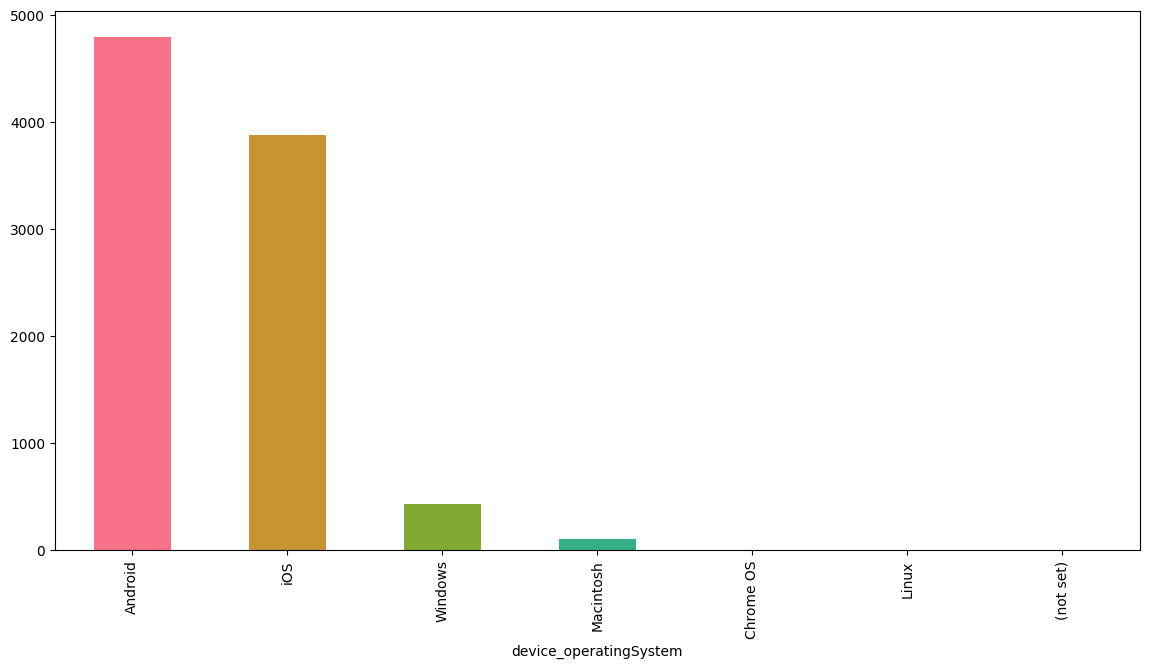

In [39]:

data_device = data_new["device_operatingSystem"].value_counts()
print(data_device)
color = sns.color_palette("husl",len(data_device))
plt.figure(figsize=(14,7))
data_device.plot(kind="bar",color=color)
plt.show()